<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/Brian2_tLab2_SergiiRomanenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install brian2

In [2]:
%matplotlib inline
from numpy import *
from numpy import random as rnd
import matplotlib.pyplot as plt
#from neuron import h
import seaborn as sns
import pandas as pd
from brian2 import *


In [3]:
defaultclock.dt = 0.025 * ms
a,b,c,d,U,V = 0.1, 0.26, -65., -1.,-15, -51 # those are specifically set in order to avoid the Izhikevich problem of spike abscence
Iapp = 0.15
tau1 = 2 * ms
tau2 = 5 * ms
Esyn =  -70.0



In [17]:
EQU = """
dv/dt = (0.04 *v**2 + 5*v + 140 - u + Iapp*cos(t/ms*2*pi/200) + (sb-sa)*(Esyn-v))/ms :1
du/dt = a*(b*v-u)/ms                                              :1
dsa/dt = -sa/tau1 :1
dsb/dt = -sb/tau2 :1
"""

n = NeuronGroup(300, EQU,
                threshold = 'v>30',
                reset = 'v=c; u=u+d',
                refractory = 1*ms)

n.v = -62. + rnd.randn(300)*20
n.u = -15. + rnd.randn(300)*5

p = PoissonInput(n, "v", 10, 10*Hz, weight= 1.0)

s = Synapses(n, n, 'w:1',
             on_pre = """
             sa_post +=w
             sb_post +=w
              """
             )

s.connect(p=0.25)
s.w = 0.03
s.delay = 3*ms

spikes = SpikeMonitor(n)

states = StateMonitor(n,['v', 'u'], record = [0, 149, 299])

run(500*ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


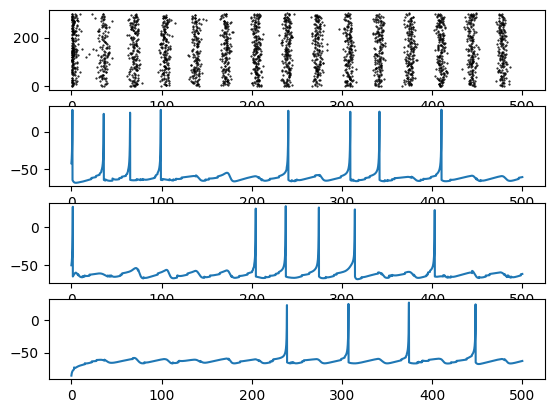

In [14]:
#weight = 1.5
ax = plt.subplot(411)
plt.plot(spikes.t/ms, spikes.i, ".k", ms = 1)
plt.subplot(412, sharex=ax)
plt.plot(states.t/ms, states.v[0])
plt.subplot(413, sharex=ax)
plt.plot(states.t/ms, states.v[1])
plt.subplot(414, sharex=ax)
plt.plot(states.t/ms, states.v[2])
plt.show()

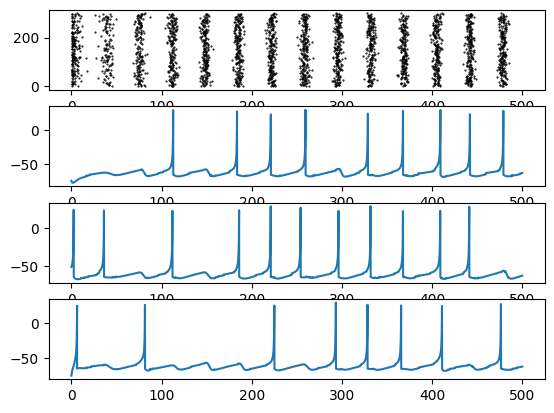

In [10]:
#weight = 1.0
ax = plt.subplot(411)
plt.plot(spikes.t/ms, spikes.i, ".k", ms = 1)
plt.subplot(412, sharex=ax)
plt.plot(states.t/ms, states.v[0])
plt.subplot(413, sharex=ax)
plt.plot(states.t/ms, states.v[1])
plt.subplot(414, sharex=ax)
plt.plot(states.t/ms, states.v[2])
plt.show()

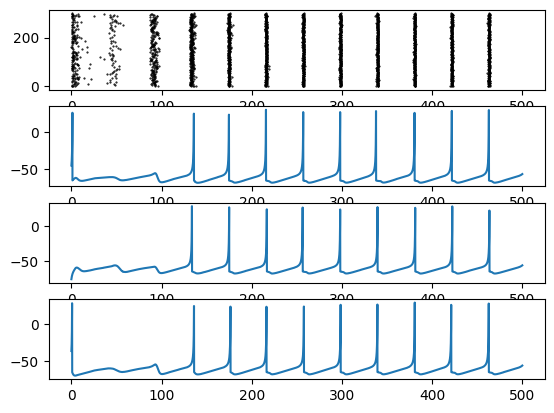

In [12]:
#weight = 0.1
ax = plt.subplot(411)
plt.plot(spikes.t/ms, spikes.i, ".k", ms = 1)
plt.subplot(412, sharex=ax)
plt.plot(states.t/ms, states.v[0])
plt.subplot(413, sharex=ax)
plt.plot(states.t/ms, states.v[1])
plt.subplot(414, sharex=ax)
plt.plot(states.t/ms, states.v[2])
plt.show()

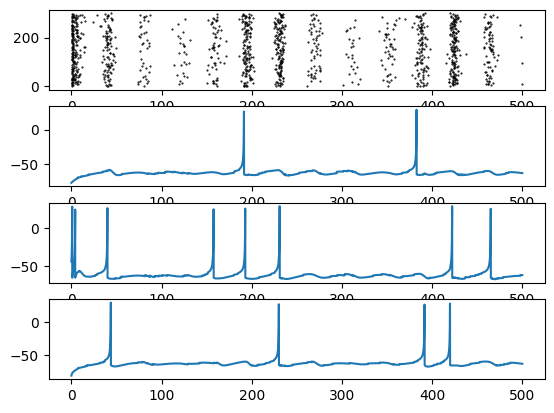

In [18]:
#weight = 1.0 with thetta rythm
ax = plt.subplot(411)
plt.plot(spikes.t/ms, spikes.i, ".k", ms = 1)
plt.subplot(412, sharex=ax)
plt.plot(states.t/ms, states.v[0])
plt.subplot(413, sharex=ax)
plt.plot(states.t/ms, states.v[1])
plt.subplot(414, sharex=ax)
plt.plot(states.t/ms, states.v[2])
plt.show()

# Let's create a playground

In [ ]:
import brian2 as b2

class BrianSimulation:
    def __init__(self):
        # Initialize the Brian2 simulation
        self.simulation_time = 1000  # Simulation time in milliseconds
        self.dt = 0.1  # Time step in milliseconds
        self.num_neurons = 100  # Number of neurons in the network

        # Create the neurons and other Brian2 objects
        self.neurons = b2.NeuronGroup(self.num_neurons, model='dv/dt = -v / (10*ms) : 1', threshold='v > 0.6', reset='v = 0')
        self.synapses = b2.Synapses(self.neurons, self.neurons, on_pre='v += 0.1')
        self.synapses.connect(p=0.1)

        # Create monitors to record variables
        self.spike_monitor = b2.SpikeMonitor(self.neurons)
        self.state_monitor = b2.StateMonitor(self.neurons, 'v', record=True)

    def run_simulation(self):
        # Run the Brian2 simulation
        b2.run(self.simulation_time * b2.ms)

    def get_spike_counts(self):
        # Get the spike counts for each neuron
        return self.spike_monitor.count

    def get_membrane_potentials(self):
        # Get the membrane potentials of the neurons
        return self.state_monitor.v

    def set_simulation_time(self, time):
        # Set the simulation time
        self.simulation_time = time

    def set_num_neurons(self, num_neurons):
        # Set the number of neurons in the network
        self.num_neurons = num_neurons
        self.neurons = b2.NeuronGroup(self.num_neurons, model='dv/dt = -v / (10*ms) : 1', threshold='v > 0.6', reset='v = 0')
        self.synapses = b2.Synapses(self.neurons, self.neurons, on_pre='v += 0.1')
        self.synapses.connect(p=0.1)
        self.spike_monitor = b2.SpikeMonitor(self.neurons)
        self.state_monitor = b2.StateMonitor(self.neurons, 'v', record=True)

# Usage example
simulation = BrianSimulation()
simulation.run_simulation()

spike_counts = simulation.get_spike_counts()
membrane_potentials = simulation.get_membrane_potentials()

print("Spike counts:", spike_counts)
print("Membrane potentials:", membrane_potentials)

simulation.set_simulation_time(2000)  # Change simulation time to 2000 ms
simulation.set_num_neurons(200)  # Change the number of neurons to 200
simulation.run_simulation()